In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


Loding dataset

In [32]:
data = pd.read_csv("general_data.csv")

In [33]:
data.columns
#Dropping few useless Column out of it

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
data.drop(["EmployeeCount","EmployeeID","Over18","StandardHours"],axis = 1 , inplace = True)

In [35]:
# Drop the few useless column of it and deleted the code
# We divide data into parts such as numerical data and categorical data
categorical = ['Attrition', 'BusinessTravel', 'Department','Education', 'EducationField', 'Gender','JobRole','MaritalStatus']
numerical =[]
for i in data.columns:
    if i not in categorical:
        numerical.append(i)
print(categorical,"\n")

print(numerical)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'] 

['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [42]:
# Dropping all the Nan Value
data.dropna(inplace=True)

In [43]:
# Watching the Outlier in the Dataset

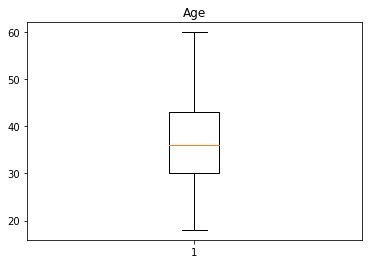

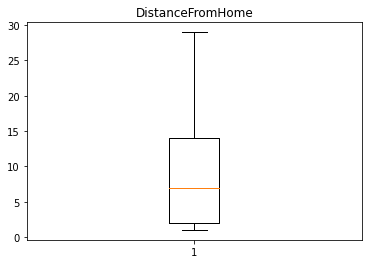

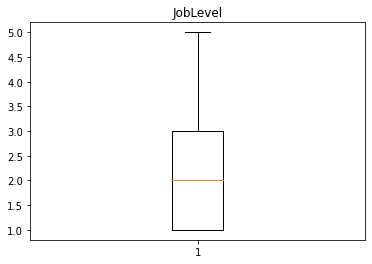

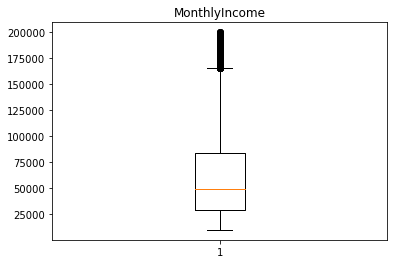

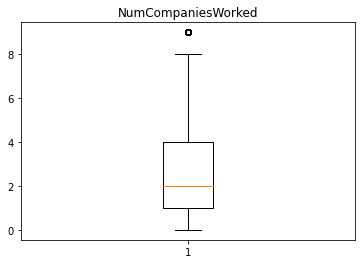

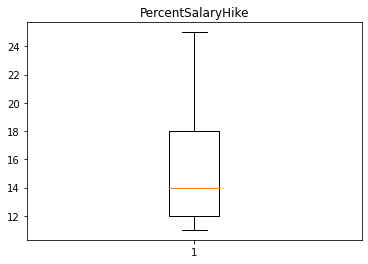

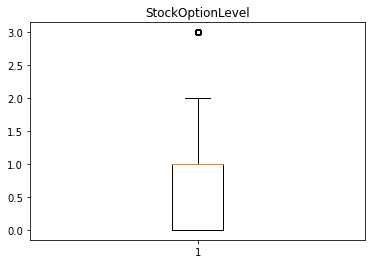

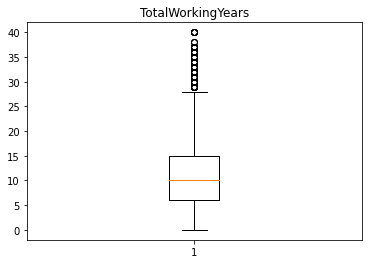

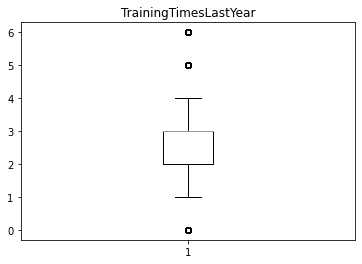

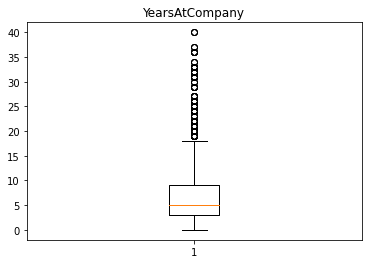

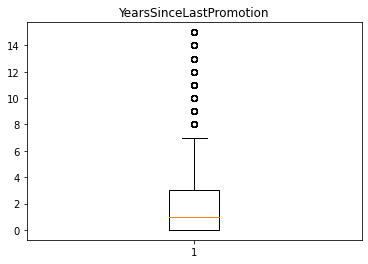

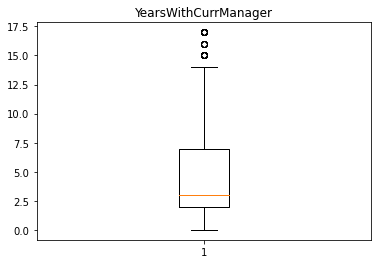

In [112]:
def outlier(num,data):
    for i in num:
        plt.title(i)
        plt.boxplot(data[i])
        plt.show()
outlier(numerical,data)
    


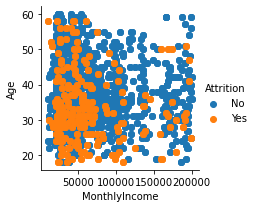

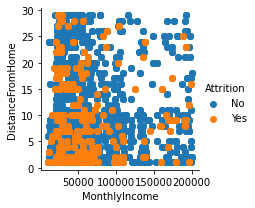

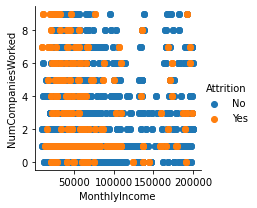

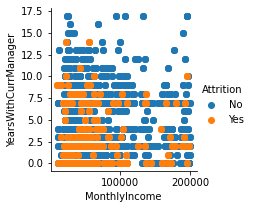

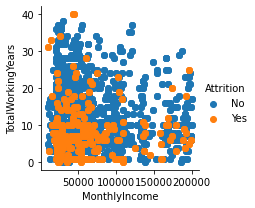

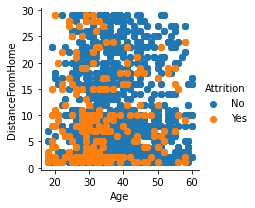

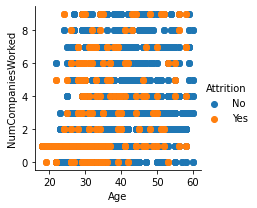

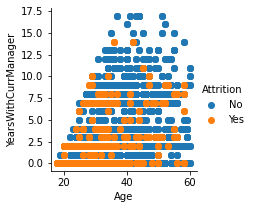

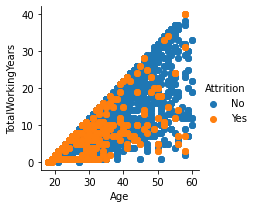

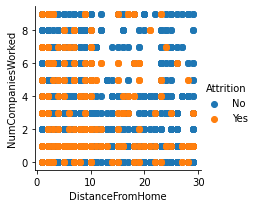

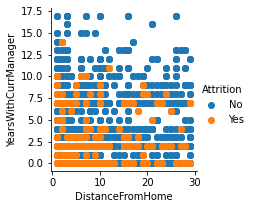

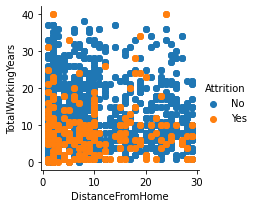

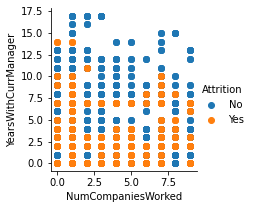

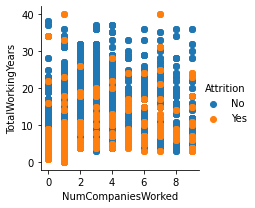

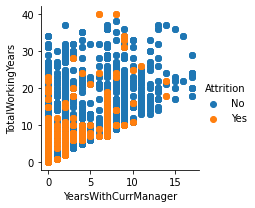

In [113]:
# Combination of all numerical data for Scatter plot
scatterdata = ["MonthlyIncome","Age","DistanceFromHome","NumCompaniesWorked", 'YearsWithCurrManager' , 'TotalWorkingYears']
from itertools import combinations
comb = combinations(scatterdata , 2)
def scatter(num):
    for i in num :
        sns.FacetGrid(data,hue="Attrition")\
        .map(plt.scatter , i[0] , i[1]) \
        .add_legend()
scatter(comb)


### Points to be noted:

### 1)We can see that the higher "age group and higher income people" are "not leaving the company soon"!

### 2)we can even notice that "below the monthlyincome of 75000" and any age group are "leaving the company"

### 3)Employee with ""> than 10 years with current manager arent leaving" the company where as ""<5 years has high rate"

### 4)"Total working Year > 20 less chance" &"< 20 higher chance"


In [66]:
# Working with the % data to exactly know which category people are leaving the company 
#Dividing data into attrition and non attrited data
att = data[data["Attrition"] == "Yes"]
non = data[data["Attrition"] == "No"]

In [101]:
def features(cate):
    for i in cate:
        print(i.title())
        
        print("For attrtion Data \n")
        print(att[i].value_counts(),"\n")
        
         
        
        print("%%%%%% Percentaage Count %%%%%%")
        index = list(att[i].value_counts().index)
        values = list(att[i].value_counts())
        totalvalues = list(data[i].value_counts())
        allvalue = {}
        
        print("The percentage count of att and complete data is \n")
        
        for j in range(len(values)):
            print("For attrited Data")
            print("This unique value is for ",index[j],"in",i)
            d1 = (values[j]/totalvalues[j]) * 100
            print(d1)
            allvalue[index[j]] = d1
        print("***********************************")
        print(max(allvalue, key=allvalue.get))
        print("***********************************")

In [102]:
features(["Department","BusinessTravel","Education","EducationField","Gender","JobLevel","JobRole","MaritalStatus","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"])

Department
For attrtion Data 

Research & Development    449
Sales                     201
Human Resources            55
Name: Department, dtype: int64 

%%%%%% Percentaage Count %%%%%%
The percentage count of att and complete data is 

For attrited Data
This unique value is for  Research & Development in Department
15.671902268760906
For attrited Data
This unique value is for  Sales in Department
15.11278195488722
For attrited Data
This unique value is for  Human Resources in Department
29.411764705882355
***********************************
Human Resources
***********************************
Businesstravel
For attrtion Data 

Travel_Rarely        465
Travel_Frequently    204
Non-Travel            36
Name: BusinessTravel, dtype: int64 

%%%%%% Percentaage Count %%%%%%
The percentage count of att and complete data is 

For attrited Data
This unique value is for  Travel_Rarely in BusinessTravel
14.956577677709875
For attrited Data
This unique value is for  Travel_Frequently in BusinessTr

In [143]:
# We Saw this Using the % value, Count value Observation can be different from this!

In [144]:
#Lets now look at once the spread of the data


In [145]:
att.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,33.628369,9.024113,2.872340,2.032624,61814.950355,2.937589,15.487943,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248
std,9.678836,7.755184,1.014463,1.048707,44890.457122,2.681283,3.785842,0.857355,7.176762,1.155899,5.960972,3.157532,3.146562
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,2.000000,1.000000,28440.000000,1.000000,12.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000
50%,32.000000,7.000000,3.000000,2.000000,49080.000000,1.000000,14.000000,1.000000,7.000000,3.000000,3.000000,1.000000,2.000000
75%,39.000000,15.000000,4.000000,2.000000,71040.000000,5.000000,18.000000,1.000000,10.000000,3.000000,7.000000,2.000000,5.000000
max,58.000000,29.000000,5.000000,5.000000,198590.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,14.000000


In [146]:
non.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,37.567038,9.232527,2.920044,2.069894,65684.209954,2.646451,15.157465,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
std,8.891816,8.171419,1.026644,1.116821,47542.428949,2.458712,3.637095,0.851527,7.765251,1.311886,6.097294,3.236300,3.595395
min,18.000000,1.000000,1.000000,1.000000,10510.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,2.000000,1.000000,29360.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49300.000000,2.000000,14.000000,1.000000,10.000000,3.000000,6.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,86060.000000,4.000000,18.000000,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,38.000000,6.000000,37.000000,15.000000,17.000000


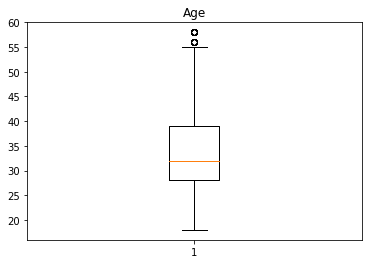

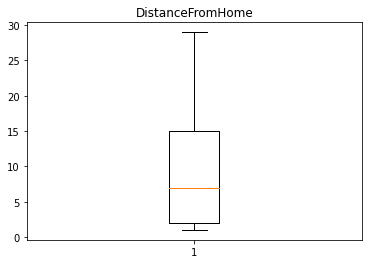

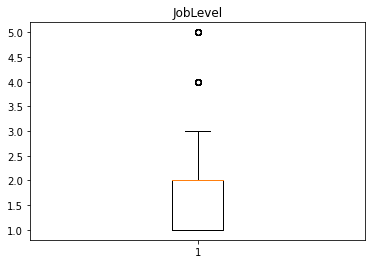

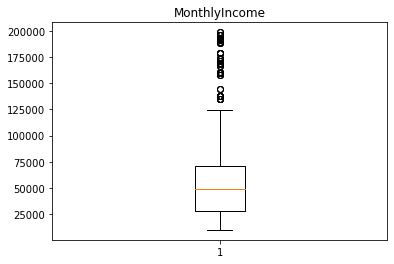

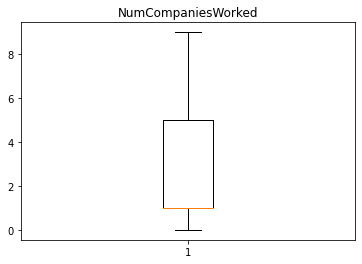

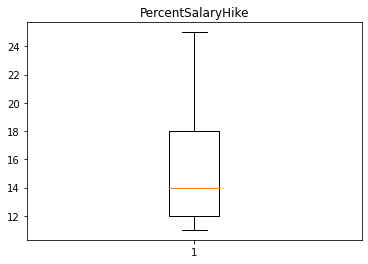

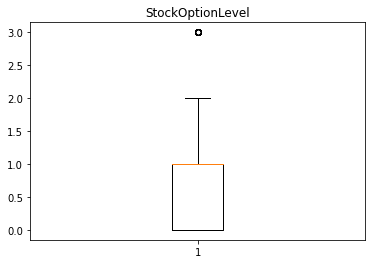

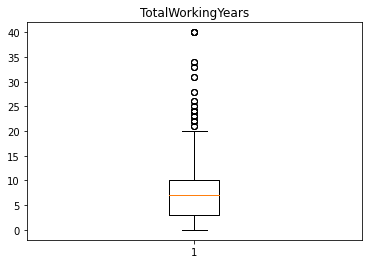

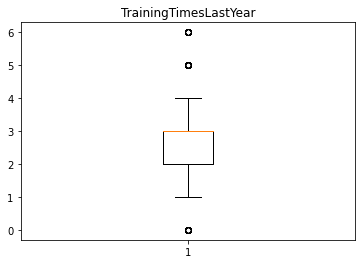

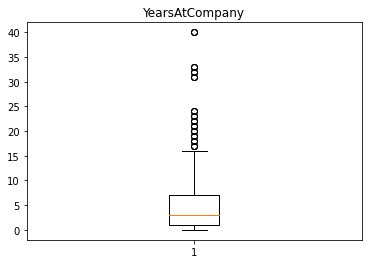

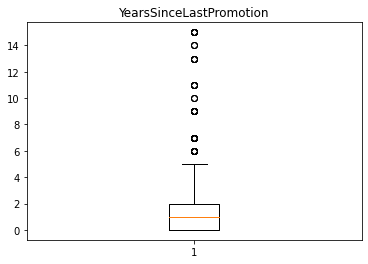

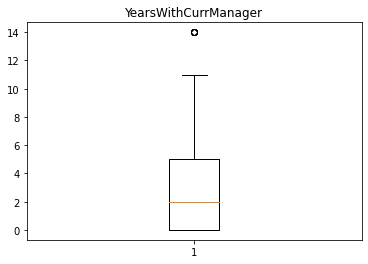

In [147]:
outlier(numerical,att)

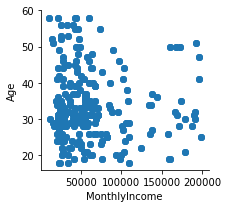

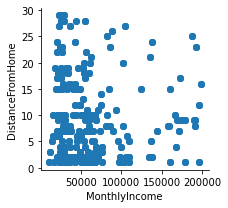

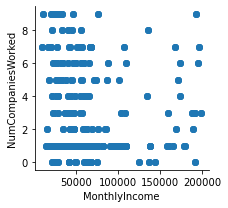

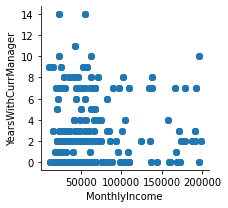

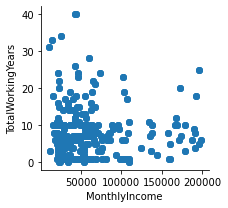

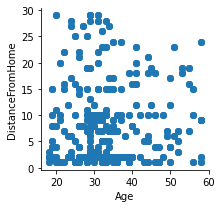

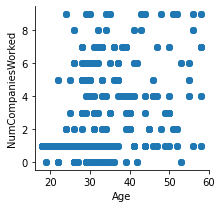

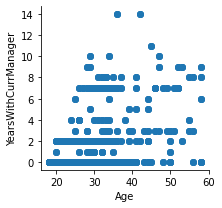

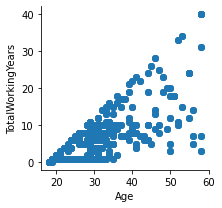

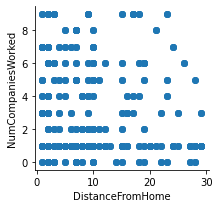

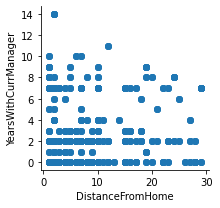

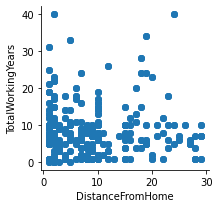

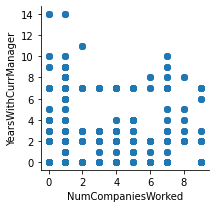

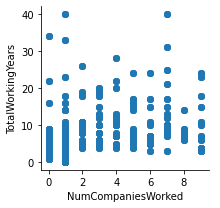

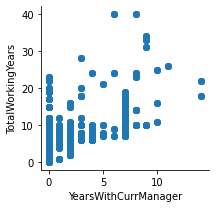

In [148]:
# Combination of all numerical data for Scatter plot
scatterdata = ["MonthlyIncome","Age","DistanceFromHome","NumCompaniesWorked", 'YearsWithCurrManager' , 'TotalWorkingYears']
from itertools import combinations
comb = combinations(scatterdata , 2)
def scatter(num):
    for i in num :
        sns.FacetGrid(att)\
        .map(plt.scatter , i[0] , i[1]) \
        .add_legend()
scatter(comb)

In [149]:
# Now we check the Skewness of attrition data
def skewness(num,att):
    for i in num:
        print(i)
        if att[i].mean() > att[i].median():
            print("positively Skewed starting value are much more for attrition")
            print("*************************************************************")
        else:
            print("Negatively Skewed ending value are much more for attrition")
            print("*************************************************************")
            
skewness(numerical,att)

Age
positively Skewed starting value are much more for attrition
*************************************************************
DistanceFromHome
positively Skewed starting value are much more for attrition
*************************************************************
JobLevel
positively Skewed starting value are much more for attrition
*************************************************************
MonthlyIncome
positively Skewed starting value are much more for attrition
*************************************************************
NumCompaniesWorked
positively Skewed starting value are much more for attrition
*************************************************************
PercentSalaryHike
positively Skewed starting value are much more for attrition
*************************************************************
StockOptionLevel
Negatively Skewed ending value are much more for attrition
*************************************************************
TotalWorkingYears
positively Skewed startin

In [150]:
att["TrainingTimesLastYear"].value_counts()

2    278
3    258
5     51
4     47
0     30
1     29
6     12
Name: TrainingTimesLastYear, dtype: int64

(array([ 30.,  29.,   0., 278.,   0., 258.,  47.,   0.,  51.,  12.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

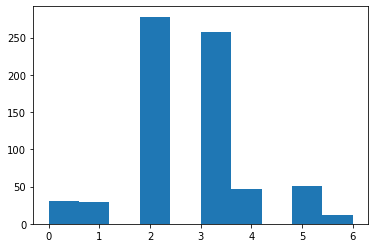

In [151]:
plt.hist(att["TrainingTimesLastYear"])

### So Finally we can conclude that this are the following reason for the attrition among the employee
### So we came out with certain condition out of features which possibily could be the reason for the attrition in the company
### Department - Human Resources
### Business travel : Travel Frequently
### Education : College
### Education Field : Other
### Gender : Male
### JobLevel : 2
### JobRole :Research Scientist
### MaritalStatus : Married
### NumCompaniesWorked : 5
### TotalWorkingYears : 2
### YearsAtCompany : 40
### YearsSinceLastPromotion : 7
### YearsWithCurrentManager : 0
### Age Group : 33-Mean range(26,33)
### DistanceFromHome -1,2Km
### "TrainingTimesLastYear" = 2,3